# PHY482 Group Project
Authors: **Kyle Taft and Thong Van**

## Abstract

Our code and computation will initially focus on a monochromatic plane wave interacting with different components essential to manipulating light via amplitude, phase, and polarization. We first explore the simple cases of the half and quarter wave plate. Next, we describe how our light wave changes with respect to an electro-optic modulator (EOM) or a voltage controlled birefringent crystal. We will compute consequences from such interactions such as sidebands and identify interesting scenarios at extremes of our set parameters(frequency, voltage, index of refraction, materials, etc).

We then decipher how our light wave changes with respect to a basic SLM unit cell in the following respective order: cover glass, birefringent crystal, mirror coating. We combine our basic SLM cell with other optical approaches such as a wave plate or even a Machl-Zehnder interferometer to design an architecture capable of creating bright, mild, and dark spots by interference. Finally, we compute how to create different kinds of patterns or even images by controlling contrast between brightness and maybe even colors. If time permits, we will compute the voltages and polarization of different incident light waves needed to create an image

## Creating a monochromatic plane wave

In [63]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [143]:
# Define constants
# c = 299792458  # Speed of light (m/s)
c = 1 
k = 4  # Wavenumber (rad/m)
w = k * c  # Angular frequency (rad/s)
E0 = 1  # Amplitude of electric field (V/m)
B0 = E0 / c  # Amplitude of magnetic field (T)

# Define the time parameters
tmax = 10
delta_t = 0.1

# Choose a propagation direction 
prop_dir = np.array([1, 0, 0])

# Choose a polarization direction
pol_dir = np.array([0, 1, 0])

def electric_field(x, y, z, t=0, prop_dir=np.array([1, 0, 0]), pol_dir=np.array([0, 1, 0])):
    """
    Calculate the electric field at a given point in space and time
    :param x,y,z: spacial coordinate of the point
    :param t: time
    :param prop_dir: propagation direction of the wave
    :param pol_dir: polarization direction of the electric field
    :param index: index specifying the direction
    :return: Ex, Ey, Ez: electric field components at the given point and time
    """
    # Define the electric field equation
    E = E0 * np.exp(1j * (k * (prop_dir[0] * x + prop_dir[1] * y + prop_dir[2] * z) - w * t))

    # Calculate electric field components
    Ex = E.real * pol_dir[0]
    Ey = (E * pol_dir[1]).real
    Ez = (E * pol_dir[2]).real
    return Ex, Ey, Ez

def magnetic_field(x, y, z, t=0, prop_dir=np.array([1, 0, 0]), pol_dir=np.array([0, 1, 0])):
    """
    Calculate the magnetic field at a given point in space and time
    :param x,y,z: spacial coordinate of the point
    :param t: time
    :param prop_dir: propagation direction of the wave
    :param pol_dir: polarization direction of the electric field
    :param index: index specifying the direction
    :return: Bx, By, Bz: magnetic field components at the given point and time
    """
    # Find the direction of the magnetic field
    B_direction = np.cross(prop_dir, pol_dir)

    # Calculate the magnetic field
    B = B0 * np.exp(1j * (k * (prop_dir[0] * x + prop_dir[1] * y + prop_dir[2] * z) - w * t))

    # Calculate magnetic field components
    Bx = B.real * B_direction[0]
    By = B.real * B_direction[1]
    Bz = B.real * B_direction[2]
    return Bx, By, Bz

def max_coordinate(prop_dir, t, index):
    """
    Define how far the wave has propagated in the given direction
    :param prop_dir: propagation direction of the wave
    :param t: time
    :param index: index specifying the direction
    :return: maximum coordinate in the given direction
    """
    if prop_dir[index] == 0:
        return 1
    else:
        return prop_dir[index] * c * t


for i, t in enumerate(np.arange(0, tmax, delta_t)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Define grid for plotting
    num_points = 100
    x = np.linspace(0, max_coordinate(prop_dir, tmax, 0), num_points)
    y = np.linspace(0, max_coordinate(prop_dir, tmax, 1), num_points)
    z = np.linspace(0, max_coordinate(prop_dir, tmax, 2), num_points)

    # Calculate the field components
    Ex, Ey, Ez = electric_field(x, y, z, t=t, prop_dir=prop_dir, pol_dir=pol_dir)
    Bx, By, Bz = magnetic_field(x, y, z, t=t, prop_dir=prop_dir, pol_dir=pol_dir)

    # Plot in 3D
    ax.plot(x, Ey, Ez, color='b', label='Electric field')
    ax.plot(x, By, Bz, color='r', label='Magnetic field')

    # Show the propagation direction
    ax.plot([0, prop_dir[0] * max_coordinate(prop_dir, tmax, 0)], 
            [0, prop_dir[1] * max_coordinate(prop_dir, tmax, 1)], 
            [0, prop_dir[2] * max_coordinate(prop_dir, tmax, 2)], color='k', linestyle='--', label='Propagation axis')

    ax.set_xlim(0, max_coordinate(prop_dir, 10, 0))
    ax.set_ylim(-1, max_coordinate(prop_dir, 10, 1))
    ax.set_zlim(-1, max_coordinate(prop_dir, 10, 2))
    ax.set_box_aspect([3, 1, 1])
    # Set the labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Mono-chromatic plane wave in 3D')
    ax.legend()
    ax.figure.savefig(f'figures/wave_{i:02d}.png')
    plt.close()


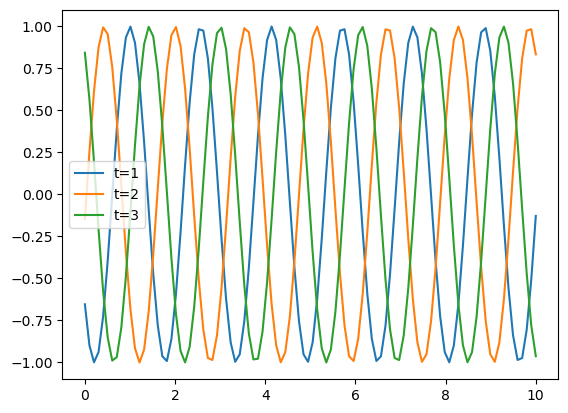

In [137]:
_, Ey1, _ = electric_field(x, y, z, t=1, prop_dir=prop_dir, pol_dir=pol_dir)
_, Ey2, _ = electric_field(x, y, z, t=2, prop_dir=prop_dir, pol_dir=pol_dir)
_, Ey3, _ = electric_field(x, y, z, t=3, prop_dir=prop_dir, pol_dir=pol_dir)

# Plot the electric field
plt.figure()
plt.plot(x, Ey1, label='t=1')
plt.plot(x, Ey2, label='t=2')
plt.plot(x, Ey3, label='t=3')
plt.legend()

In [129]:
# Convert to GIF using ffmpeg
import subprocess

# # Command to convert images to GIF
# command = ['ffmpeg', '-framerate', '5', '-i', 'figures/wave_%03d.png', 'output.gif']

# Command: ffmpeg -framerate 5 -start_number 0 -i wave_%02d.png output.gif
command = ['ffmpeg', '-framerate', '5', '-start_number', '0', '-i', 'figures/wave_%02d.png', 'output.gif']
# Run the command
subprocess.run(command)

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

CompletedProcess(args=['ffmpeg', '-framerate', '5', '-start_number', '0', '-i', 'figures/wave_%02d.png', 'output.gif'], returncode=0)

# Half-wave plate and Quarter-wave plate

A waveplate is characterized by the difference in phase it introduces to an incident wave given by $ \Gamma = \frac{2 \pi \Delta n L}{\lambda _0}$. Here, $\Delta n$ is the difference of refractive index between the fast and slow axis of the birefringent crystal, $L$ is the crystals thickness, and $\lambda _0$ is the wavelength of the incident light in a vacuum. For the following demonstration, we place a waveplate at the $x=5$ plane represented by the green surface. Furthermore, we let the propagation of our light be normal to our waveplate and only show the electric field so that it is easier to see the change in polarization.

In [184]:
# Waveplate


def waveplate(deltan, lambda0, L, platetype, save_as, plate=5):
    """
    Generate a representation of a wave interacting with a waveplate
    :param deltan: difference of refractive index between fast and slow axis
    :param lambda0: wavelength of the light wave in a vacuum
    :param L: Length of the waveplate
    :param save_as: Base name of saved images
    :param plate: location of the plate along the x-axis
    """
    def gamma(deltan, lambda0, L):
        """
        Determine gamma (phase shift) as shown in the equation above
        :param deltan: difference of refractive index between fast and slow axis
        :param lambda0: wavelength of the light wave in a vacuum
        :param L: Length of the waveplate
        """
        return 2*np.pi*deltan*L / lambda0
    
    phase = gamma(deltan, lambda0, L)

    # Decide whether to include a half or quarter waveplate
    if platetype == 'half':
        pol_dir2 = np.array([0,np.cos(phase),np.sin(phase)])
    elif platetype == 'quarter':
        pol_dir2 = np.array([0, 1 , np.exp(1j*phase)])
        
    for i, t in enumerate(np.arange(0, tmax, delta_t)):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        # Define grid for plotting
        num_points = 50
        
        x = np.linspace(0, plate, num_points)
        y = np.linspace(0, max_coordinate(prop_dir, tmax, 1), num_points)
        z = np.linspace(0, max_coordinate(prop_dir, tmax, 2), num_points)

        
        x2 = np.linspace(plate, max_coordinate(prop_dir, tmax, 0), num_points)
        y2 = np.linspace(plate, max_coordinate(prop_dir, tmax, 1), num_points)
        z2 = np.linspace(plate, max_coordinate(prop_dir, tmax, 2), num_points)

        # Calculate the field components
        Ex, Ey, Ez = electric_field(x, y, z, t=t, prop_dir=prop_dir, pol_dir=pol_dir)
        # Calculate the field components after waveplate
        Ex2, Ey2, Ez2 = electric_field(x, y, z, t=t, prop_dir=prop_dir, pol_dir=pol_dir2)

        
        # Plot in 3D
        ax.plot(x, Ey, Ez, color='b', label='Electric field')
    
        # Show the propagation direction
        ax.plot([0, prop_dir[0] * max_coordinate(prop_dir, tmax, 0)], 
                [0, prop_dir[1] * max_coordinate(prop_dir, tmax, 1)], 
                [0, prop_dir[2] * max_coordinate(prop_dir, tmax, 2)], color='k', linestyle='--', label='Propagation axis')

        ax.plot(x2, Ey2.real, Ez2.real, color='b')
    
        ax.set_xlim(0, max_coordinate(prop_dir, 10, 0))
        ax.set_ylim(-1, max_coordinate(prop_dir, 10, 1))
        ax.set_zlim(-1, max_coordinate(prop_dir, 10, 2))

        x_start = plate
        y_limits = [-1, max_coordinate(prop_dir, 10, 1)]
        z_limits = [-1, max_coordinate(prop_dir, 10, 2)]
        vertices = [(x_start, y_limits[0], z_limits[0]),
            (x_start, y_limits[0], z_limits[1]),
            (x_start, y_limits[1], z_limits[1]),
            (x_start, y_limits[1], z_limits[0])]
        verts = [vertices]

        ax.view_init(15, 45)
        
        ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, facecolor='g'))
        ax.set_box_aspect([3, 1, 1])
        # Set the labels and title
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('Mono-chromatic plane wave in 3D')
        ax.legend()
        #plt.show()
        ax.figure.savefig(f'figures/{save_as}_{i:02d}.png')
        plt.close()


In [190]:
## Save the collection of images produced from the function.
deltan = .5*(1/2) # Difference between refractive indices of the wave plate
L = 5e-7 # Length of the waveplate itself [m]
lambda0 = 5e-7 # Wavelength of the light in vacuum [m]
plate_type = 'half' # Choose 'quarter' or 'half' for the type of waveplate
image_name = f'{plate_type}_phase_90' # Base name for images

waveplate(deltan, L, lambda0, plate_type, image_name) # Produce set of images for wave

# Convert to GIF using ffmpeg
subprocess.run(['rm', f'{image_name}.gif'])
command = ['ffmpeg', '-framerate', '5', '-start_number', '0', '-i', f'figures/{image_name}_%02d.png', '-pix_fmt', 'rgb24', f'{image_name}.gif']
# Run the command
subprocess.run(command)


rm: cannot remove 'half_phase_90.gif': No such file or directory
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwol

CompletedProcess(args=['ffmpeg', '-framerate', '5', '-start_number', '0', '-i', 'figures/half_phase_90_%02d.png', '-pix_fmt', 'rgb24', 'half_phase_90.gif'], returncode=0)